In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('artifacts\data_ingestion\healthcare-dataset-stroke-data.csv')
df

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\91812\AppData\Local\Temp\ipykernel_32272\1682197501.py:1: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv('artifacts\data_ingestion\healthcare-dataset-stroke-data.csv')


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [5]:
obj_cols = df.select_dtypes('object').columns

for col in obj_cols:
    
    print(df[col].unique())


['Male' 'Female' 'Other']
['Yes' 'No']
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
['Urban' 'Rural']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [28]:
df.drop('id' , axis=1 , inplace = True)

dropped 'id' column from dataset 

In [18]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Only bmi column have null values

In [26]:
df['gender'].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

There is only one Other gender so removing it will be benficial

In [34]:
df.drop(df[df['gender'] == 'Other'].index , inplace = True)

<Axes: xlabel='gender'>

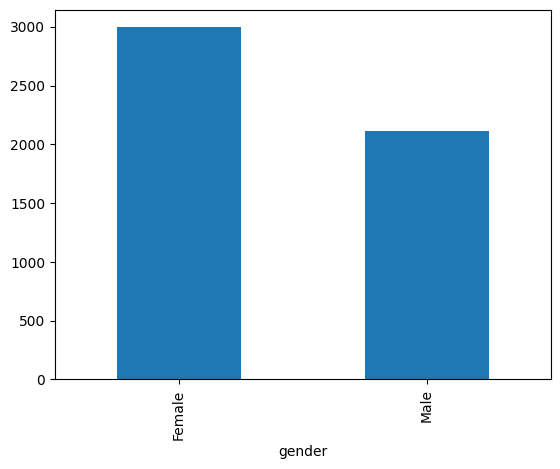

In [43]:
df['gender'].value_counts().plot(kind='bar')

<Axes: xlabel='ever_married'>

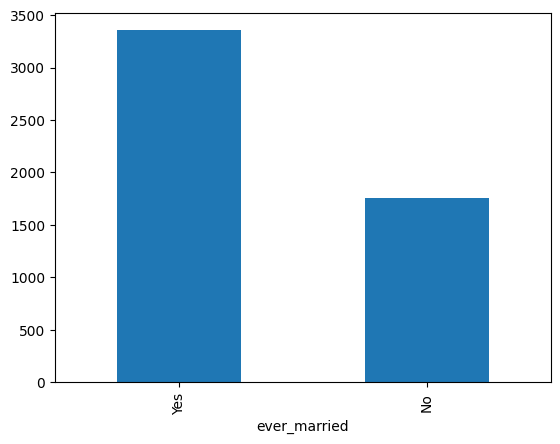

In [44]:
df['ever_married'].value_counts().plot(kind='bar')


<Axes: xlabel='work_type', ylabel='count'>

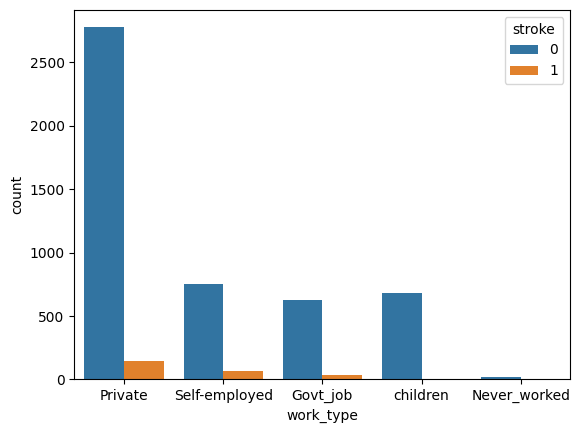

In [52]:
sns.countplot(data=df, x='work_type', hue='stroke')


<Axes: xlabel='Residence_type', ylabel='count'>

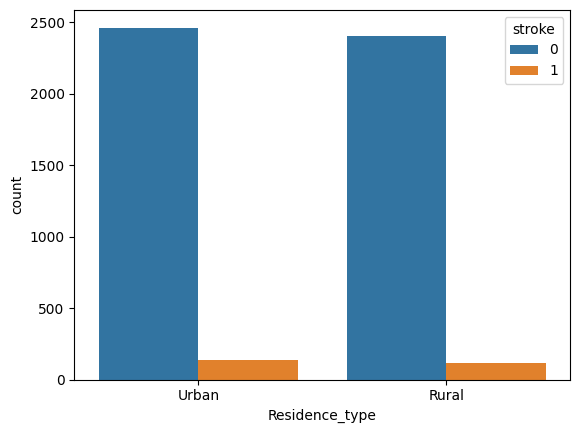

In [51]:
sns.countplot(data=df, x='Residence_type', hue='stroke')


<Axes: xlabel='smoking_status', ylabel='count'>

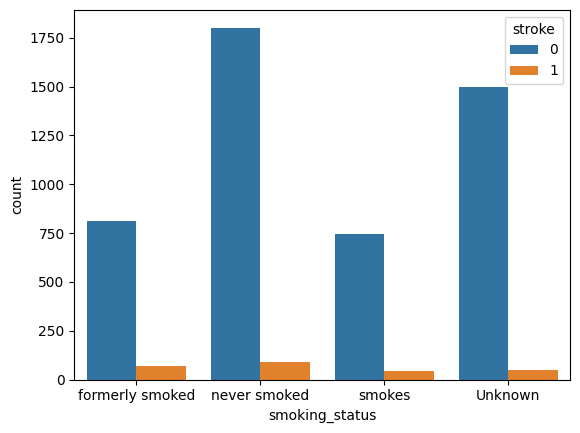

In [49]:
sns.countplot(data=df, x='smoking_status', hue='stroke')


<Axes: xlabel='stroke'>

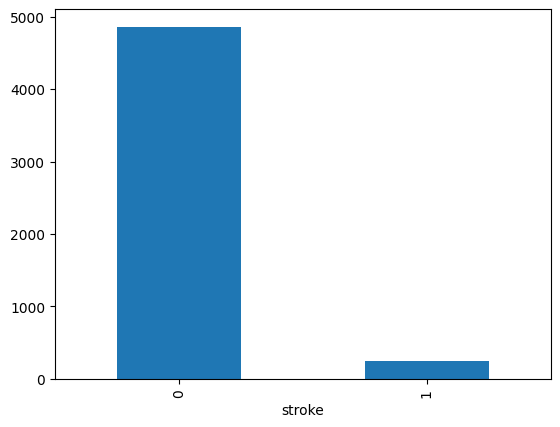

In [53]:
df['stroke'].value_counts().plot(kind='bar')

It is a highly imbalanced dataset 

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5109 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5109 non-null   int64  
 1   gender             5109 non-null   object 
 2   age                5109 non-null   float64
 3   hypertension       5109 non-null   int64  
 4   heart_disease      5109 non-null   int64  
 5   ever_married       5109 non-null   object 
 6   work_type          5109 non-null   object 
 7   Residence_type     5109 non-null   object 
 8   avg_glucose_level  5109 non-null   float64
 9   bmi                4908 non-null   float64
 10  smoking_status     5109 non-null   object 
 11  stroke             5109 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 518.9+ KB


In [29]:
object_columns= df.select_dtypes(include='object').columns

In [30]:
from sklearn.preprocessing import LabelEncoder
import pickle

def encode_categorical_columns(df, categorical_columns):
    """
    Encode multiple categorical columns using LabelEncoder and save the encoders.
    
    Parameters:
    df (pandas.DataFrame): The DataFrame containing the categorical columns to be encoded.
    categorical_columns (list): A list of column names containing categorical data.
    
    Returns:
    pandas.DataFrame: DataFrame with categorical columns encoded.
    dict: Dictionary containing encoder objects for each categorical column.
    """
    encoders = {}  # Dictionary to store encoder objects
    
    for col in categorical_columns:
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col])  # Add encoded column to DataFrame
        encoders[col] = encoder  # Store encoder object in dictionary
    
    # Save encoders using pickle
    with open('encoders.pkl', 'wb') as f:
        pickle.dump(encoders, f)
    
    return df, encoders



In [67]:
df , encoders = encode_categorical_columns(df , object_columns)

In [31]:
df.select_dtypes(exclude='object')

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67.0,0,1,228.69,36.6,1
1,61.0,0,0,202.21,NaN,1
2,80.0,0,1,105.92,32.5,1
3,49.0,0,0,171.23,34.4,1
4,79.0,1,0,174.12,24.0,1
...,...,...,...,...,...,...
5105,80.0,1,0,83.75,NaN,0
5106,81.0,0,0,125.20,40.0,0
5107,35.0,0,0,82.99,30.6,0
5108,51.0,0,0,166.29,25.6,0


In [32]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [47]:
df.drop('id' , axis=1 ,  inplace= True)

In [48]:
df.dropna(inplace=True)


In [49]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [51]:
object_columns= df.select_dtypes(include=['object','bool']).columns
df , encoder = encode_categorical_columns(df , object_columns)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group_middle_aged,age_group_senior
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1,0,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1,0,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1,0,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1,0,1
5,1,81.0,0,0,1,2,1,186.21,29.0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,0,13.0,0,0,0,4,0,103.08,18.6,0,0,0,0
5106,0,81.0,0,0,1,3,1,125.20,40.0,2,0,0,1
5107,0,35.0,0,0,1,3,0,82.99,30.6,2,0,1,0
5108,1,51.0,0,0,1,2,0,166.29,25.6,1,0,0,1


In [53]:
df_new = df

In [55]:
df


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group_middle_aged,age_group_senior
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1,0,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1,0,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1,0,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1,0,1
5,1,81.0,0,0,1,2,1,186.21,29.0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,0,13.0,0,0,0,4,0,103.08,18.6,0,0,0,0
5106,0,81.0,0,0,1,3,1,125.20,40.0,2,0,0,1
5107,0,35.0,0,0,1,3,0,82.99,30.6,2,0,1,0
5108,1,51.0,0,0,1,2,0,166.29,25.6,1,0,0,1


In [50]:
import pandas as pd

# Assuming 'df' is your DataFrame with 'age' and 'marriage' columns
# Creating age groups
bins = [0, 25, 40, 100]  # Define age bins
labels = ['young_adult', 'middle_aged', 'senior']  # Define labels for age groups
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Converting age groups into dummy variables
df = pd.get_dummies(df, columns=['age_group'], drop_first=True)

# Display the updated DataFrame
print(df.head())


   gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
2    Male  80.0             0              1          Yes        Private   
3  Female  49.0             0              0          Yes        Private   
4  Female  79.0             1              0          Yes  Self-employed   
5    Male  81.0             0              0          Yes        Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  \
0          Urban             228.69  36.6  formerly smoked       1   
2          Rural             105.92  32.5     never smoked       1   
3          Urban             171.23  34.4           smokes       1   
4          Rural             174.12  24.0     never smoked       1   
5          Urban             186.21  29.0  formerly smoked       1   

   age_group_middle_aged  age_group_senior  
0                  False              True  
2                  False        

In [26]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group_middle_aged,age_group_senior
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1,False,True
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1,False,True
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1,False,True
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1,False,True
5,1,81.0,0,0,1,2,1,186.21,29.0,1,1,False,True


In [57]:
df.drop('age' , axis=1 , inplace=True) 


In [44]:
df

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group_middle_aged,age_group_senior
0,1,0,1,1,2,1,228.69,36.6,1,1,0,1
2,1,0,1,1,2,0,105.92,32.5,2,1,0,1
3,0,0,0,1,2,1,171.23,34.4,3,1,0,1
4,0,1,0,1,3,0,174.12,24.0,2,1,0,1
5,1,0,0,1,2,1,186.21,29.0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,0,0,0,0,4,0,103.08,18.6,0,0,0,0
5106,0,0,0,1,3,1,125.20,40.0,2,0,0,1
5107,0,0,0,1,3,0,82.99,30.6,2,0,1,0
5108,1,0,0,1,2,0,166.29,25.6,1,0,0,1


In [56]:
from sklearn.preprocessing import MinMaxScaler
feature_to_scale = ['avg_glucose_level' , 'bmi']

min_max = MinMaxScaler()
df[feature_to_scale] = min_max.fit_transform(df[feature_to_scale])
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group_middle_aged,age_group_senior
0,1,67.0,0,1,1,2,1,0.801265,0.301260,1,1,0,1
2,1,80.0,0,1,1,2,0,0.234512,0.254296,2,1,0,1
3,0,49.0,0,0,1,2,1,0.536008,0.276060,3,1,0,1
4,0,79.0,1,0,1,3,0,0.549349,0.156930,2,1,0,1
5,1,81.0,0,0,1,2,1,0.605161,0.214204,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,0,13.0,0,0,0,4,0,0.221402,0.095074,0,0,0,0
5106,0,81.0,0,0,1,3,1,0.323516,0.340206,2,0,0,1
5107,0,35.0,0,0,1,3,0,0.128658,0.232532,2,0,1,0
5108,1,51.0,0,0,1,2,0,0.513203,0.175258,1,0,0,1


In [59]:
with open('min_max_scalar.pkl', 'wb') as f:
        pickle.dump(min_max, f)

In [58]:
df

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group_middle_aged,age_group_senior
0,1,0,1,1,2,1,0.801265,0.301260,1,1,0,1
2,1,0,1,1,2,0,0.234512,0.254296,2,1,0,1
3,0,0,0,1,2,1,0.536008,0.276060,3,1,0,1
4,0,1,0,1,3,0,0.549349,0.156930,2,1,0,1
5,1,0,0,1,2,1,0.605161,0.214204,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,0,0,0,0,4,0,0.221402,0.095074,0,0,0,0
5106,0,0,0,1,3,1,0.323516,0.340206,2,0,0,1
5107,0,0,0,1,3,0,0.128658,0.232532,2,0,1,0
5108,1,0,0,1,2,0,0.513203,0.175258,1,0,0,1


In [ ]:
def transform_data(self):

    df.drop('id' , axis=1 ,  inplace= True) # drop id column
    df.dropna(inplace=True) # dropping all NA field Columns

    object_columns= df.select_dtypes(include=['object','bool']).columns # selecting only object datatype columns
    df , encoder = encode_categorical_columns(df , object_columns) # encoding categorical columns
    df.drop('age' , axis=1 , inplace=True) # dropping age column after removing multicollinearity

    feature_to_scale = ['avg_glucose_level' , 'bmi']
    min_max = MinMaxScaler()
    df[feature_to_scale] = min_max.fit_transform(df[feature_to_scale])
    


    return df




    

    



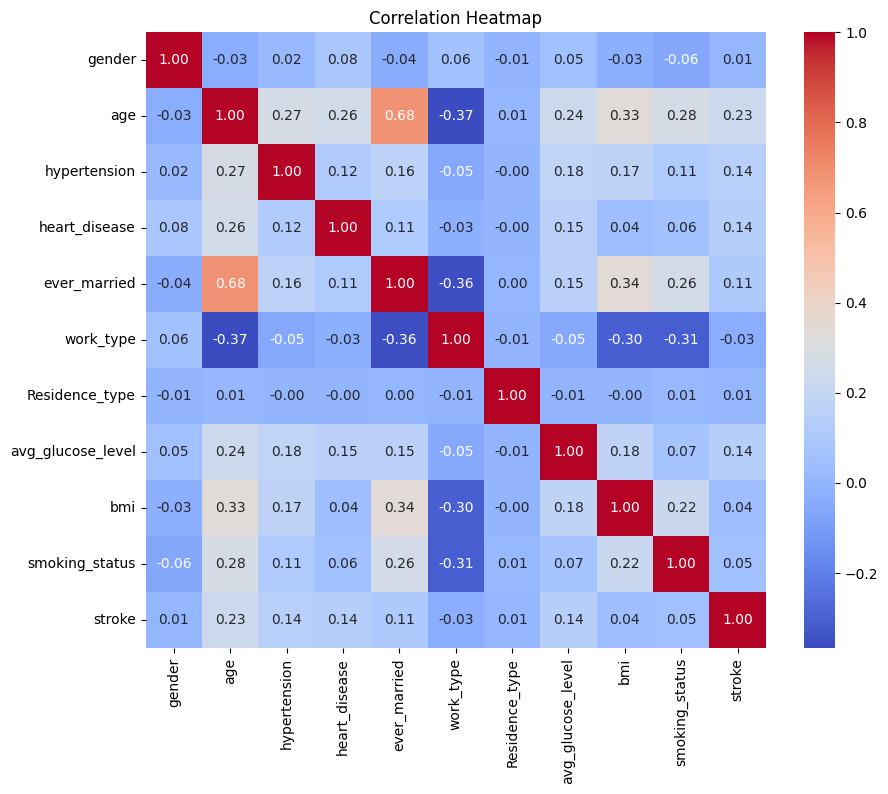

In [24]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

<Axes: xlabel='avg_glucose_level'>

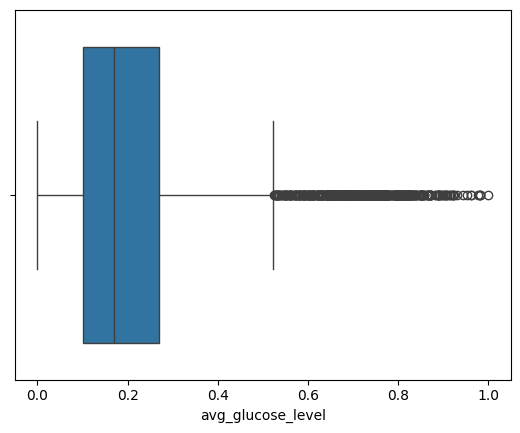

In [61]:
sns.boxplot(x = 'avg_glucose_level' , data = df)

<Axes: xlabel='bmi'>

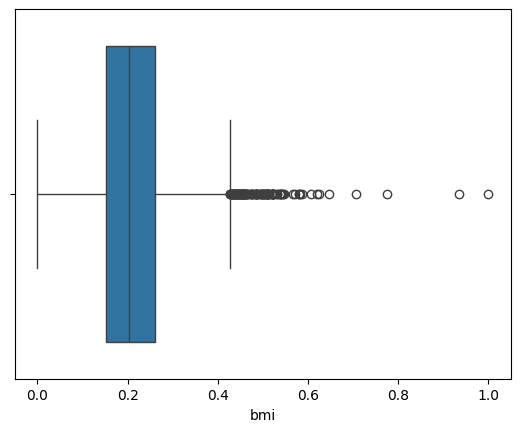

In [62]:
sns.boxplot(x = 'bmi' , data = df)

In [65]:
import numpy as np

def find_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = [x for x in data if x < lower_bound or x > upper_bound]
    return outliers

# Assuming 'data' is your array or list containing the data
outliers_iqr = find_outliers_iqr(df['bmi'])
num_outliers_iqr = len(outliers_iqr)
print("Number of outliers (IQR method):", num_outliers_iqr)


Number of outliers (IQR method): 110


In [71]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

def encode_and_drop(self, df):
        object_columns = df.select_dtypes(include=['object', 'bool']).columns
        
        # Define a column transformer for encoding categorical columns
        column_transformer = ColumnTransformer([
            ('encoder', LabelEncoder(), object_columns),
        ], remainder='passthrough')  # Remainder columns will be untouched
        
        # Apply column transformer to encode categorical columns
        encoded_data = column_transformer.fit_transform(df)
        
        # Save encoders using pickle
        with open('encoders.pkl', 'wb') as f:
            pickle.dump(column_transformer.named_transformers_['encoder'], f)
        
        # Convert the encoded data back to a DataFrame
        df_encoded = pd.DataFrame(encoded_data, columns=df.columns)
        
        # Drop 'age' column
        df_encoded.drop('age', axis=1, inplace=True)
        
        return df_encoded

In [68]:
df_temp = pd.read_csv("artifacts\data_ingestion\healthcare-dataset-stroke-data.csv")

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\91812\AppData\Local\Temp\ipykernel_40088\3463486056.py:1: SyntaxWarning: invalid escape sequence '\d'
  df_temp = pd.read_csv("artifacts\data_ingestion\healthcare-dataset-stroke-data.csv")


In [75]:
object_columns = df_temp.select_dtypes(include=['object']).columns
        
# Define a column transformer for encoding categorical columns
column_transformer = ColumnTransformer([
    ('encoder', LabelEncoder(), object_columns),
], remainder='passthrough')  # Remainder columns will be untouched

# Apply column transformer to encode categorical columns
encoded_data = column_transformer.fit_transform(df_temp)

encoders = column_transformer.named_transformers_['encoder']
# Save encoders using pickle
with open('encoders.pkl', 'wb') as f:
    pickle.dump(column_transformer.named_transformers_['encoder'], f)

TypeError: LabelEncoder.fit_transform() takes 2 positional arguments but 3 were given